In [42]:
# using Pkg
# Pkg.activate("./")

 Activating new environment at `~/Numerics/RigettiMatching/Project.toml`


In [220]:
using QSimulator 
# using Optim
# using LsqFit
# using NLsolve
# using Roots
# using QuadGK
using PyPlot
using LinearAlgebra
# using Interpolations
# using FFTW
using SpecialFunctions
# import Statistics

# import QuantumInfo: liou, avgfidelity, kraus2liou # open-source package
# import Cliffords: Z
# using Optim
using LinearAlgebra: diagm
# Make sure it's using the local development package
pathof(QSimulator)
using LinearAlgebra
function printFull(x)
    show(IOContext(stdout, :limit => true, :displaysize => (1000, 1000)), "text/plain", x)
    println()
end

printFull (generic function with 1 method)

In [191]:
q0 = PerturbativeTransmon("q0", 3, TransmonSpec(0.18109155, 17.502335025, 3.072995))  # Tunable
q1 = DuffingTransmon("q1", 3, DuffingSpec(3.887, -0.187) ) # Fixed

g = 0.01
freq = 0.3922
phim = 0.6

0.6

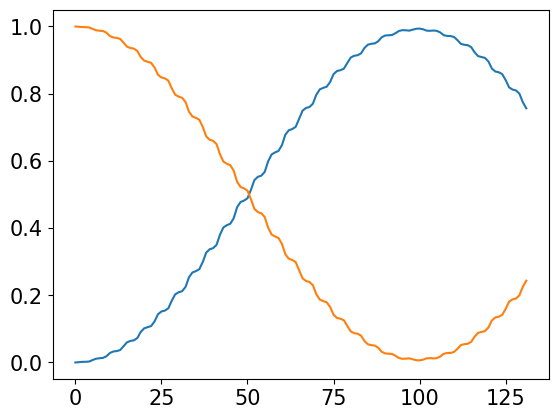

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x224545130>

In [192]:
# LAB FRAME

cqs = CompositeQSystem([q0, q1])
add_hamiltonian!(cqs, q1)  # fixed transmon
add_hamiltonian!(cqs, g01*X([q0, q1]), [q0,q1]) #coupling
add_hamiltonian!(cqs, parametric_drive(q0, t -> phim*sin(2π*freq*t)), q0) # tunable transmon

# Initial state vector in 3x3 system
phi0 = zeros(ComplexF64,9) 
phi0[4] = 1.0 + im*0.0     #|10>

# RUN
times = 0:131
phi_all = unitary_state(cqs, times, phi0);
pop₀₁ = [abs2(ψ[2]) for ψ in phi_all]
pop₁₀ = [abs2(ψ[4]) for ψ in phi_all];
plot(times, pop₀₁)
plot(times, pop₁₀)

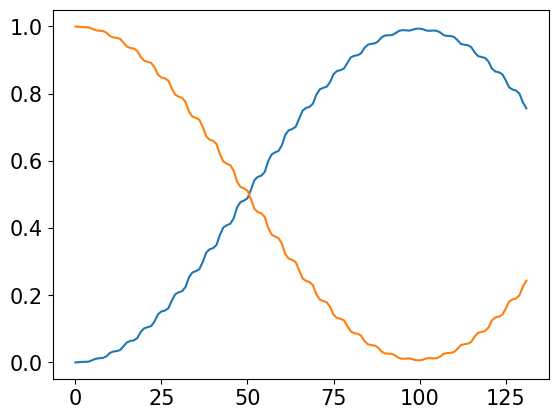

Rotation frequency tunable qubit: 5.271988924058265
Rotation frequency fixed qubit: 3.887


1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x223b6d430>

In [214]:
# DOUBLY ROTATING FRAME

cqs = CompositeQSystem([q0, q1])

w1 = spec(q1).frequency
w0 = hamiltonian(q0, 0.0)[2,2]
eta01 = w1 - w0
println("Rotation frequency tunable qubit: ", w0)
println("Rotation frequency fixed qubit: ", w1)


# add transmons
add_hamiltonian!(cqs, parametric_drive(q0, t -> phim*sin(2π*freq*t)), q0) # tunable transmon
add_hamiltonian!(cqs, q1) # fixed transmon

# substract rotating frame Hamiltonian shifts
add_hamiltonian!(cqs, -w0*number(q0), q0)
add_hamiltonian!(cqs, -w1*number(q1), q1)

# Add time dependent coupling
add_hamiltonian!(cqs, t -> g01/2*X_Y([q0, q1], [0.0,eta01*t]), [q0,q1])


# Initial state vector in 3x3 system
phi0 = zeros(ComplexF64,9) 
phi0[4] = 1.0 + im*0.0     #|10>

# RUN
times = 0:131
phi_all = unitary_state(cqs, times, phi0);
pop₀₁ = [abs2(ψ[2]) for ψ in phi_all]
pop₁₀ = [abs2(ψ[4]) for ψ in phi_all];
plot(times, pop₀₁)
plot(times, pop₁₀)

In [224]:
t = 1.0
xy=X_Y([q0, q1], [0.0,eta01*t])
printFull(real(xy))
printFull(imag(xy))

9×9 Matrix{Float64}:
 0.0   0.0       0.0      0.0       0.0      0.0       0.0      0.0      0.0
 0.0   0.0       0.0     -1.50013   0.0      0.0       0.0      0.0      0.0
 0.0   0.0       0.0      0.0      -2.1215   0.0       0.0      0.0      0.0
 0.0  -1.50013   0.0      0.0       0.0      0.0       0.0      0.0      0.0
 0.0   0.0      -2.1215   0.0       0.0      0.0      -2.1215   0.0      0.0
 0.0   0.0       0.0      0.0       0.0      0.0       0.0     -3.00026  0.0
 0.0   0.0       0.0      0.0      -2.1215   0.0       0.0      0.0      0.0
 0.0   0.0       0.0      0.0       0.0     -3.00026   0.0      0.0      0.0
 0.0   0.0       0.0      0.0       0.0      0.0       0.0      0.0      0.0
9×9 Matrix{Float64}:
 0.0  0.0      0.0       0.0       0.0      0.0       0.0       0.0      0.0
 0.0  0.0      0.0      -1.32273   0.0      0.0       0.0       0.0      0.0
 0.0  0.0      0.0       0.0      -1.87062  0.0       0.0       0.0      0.0
 0.0  1.32273  0.0       0.0      